In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf



In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/GlobalAIHub/IntroductionToDeepLearning/Urban Sounds Classification/dataset'
with open(path,"rb") as f:
    X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(f)

In [9]:
X_train[2].shape

(128, 128)

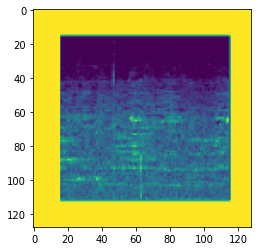

In [10]:
plt.imshow(X_test[15])
plt.show()

In [28]:
# Create a model object
model = tf.keras.Sequential()

In [29]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                              kernel_size = (3,3),
                              strides = (1,1),
                              padding = "same",
                              activation = "tanh",
                              input_shape = (128,128,1)))

model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                              kernel_size = (3,3),
                              strides = (1,1),
                              padding = "same",
                              activation = "tanh"))

model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                              kernel_size = (3,3),
                              strides = (1,1),
                              padding = "same",
                              activation = "tanh"))
model.add(tf.keras.layers.MaxPool2D((2,2)))


model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [30]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [31]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = 'tanh'))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation = 'tanh'))
model.add(tf.keras.layers.Dropout(0.5))



In [32]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [33]:
# Compile the model
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [34]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train,
                    batch_size = 128,
                    epochs = 50,
                    validation_data = (X_val,y_val))

Epoch 1/50
55/55 [==============================] - 4s 63ms/step - loss: 1.9295 - accuracy: 0.2918 - val_loss: 1.3811 - val_accuracy: 0.5086
Epoch 2/50
55/55 [==============================] - 3s 58ms/step - loss: 1.4810 - accuracy: 0.4756 - val_loss: 1.1082 - val_accuracy: 0.6426
Epoch 3/50
55/55 [==============================] - 3s 58ms/step - loss: 1.2733 - accuracy: 0.5566 - val_loss: 0.9471 - val_accuracy: 0.6999
Epoch 4/50
55/55 [==============================] - 3s 61ms/step - loss: 1.1075 - accuracy: 0.6202 - val_loss: 0.7845 - val_accuracy: 0.7537
Epoch 5/50
55/55 [==============================] - 3s 61ms/step - loss: 0.9719 - accuracy: 0.6732 - val_loss: 0.7374 - val_accuracy: 0.7560
Epoch 6/50
55/55 [==============================] - 3s 58ms/step - loss: 0.8574 - accuracy: 0.7105 - val_loss: 0.6364 - val_accuracy: 0.8041
Epoch 7/50
55/55 [==============================] - 3s 58ms/step - loss: 0.7590 - accuracy: 0.7518 - val_loss: 0.5873 - val_accuracy: 0.8121
Epoch 8/50
55

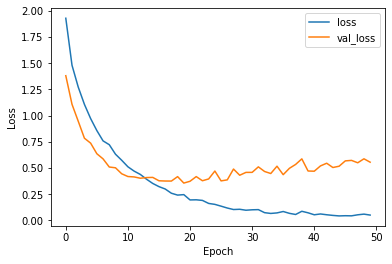

In [35]:
# Plot the the training loss
plt.plot(results.history['loss'], label = 'loss')

# Plot the the validation loss
plt.plot(results.history['val_loss'], label = 'val_loss')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Put legend table
plt.legend()

# Show the plot
plt.show()

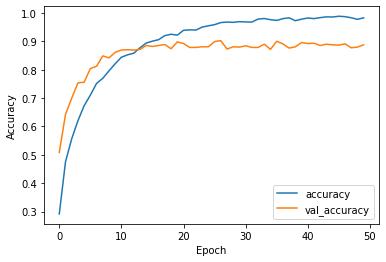

In [36]:
# Plot the the training accuracy
plt.plot(results.history['accuracy'], label = 'accuracy')


# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Put legend table
plt.legend()

# Show the plot
plt.show()

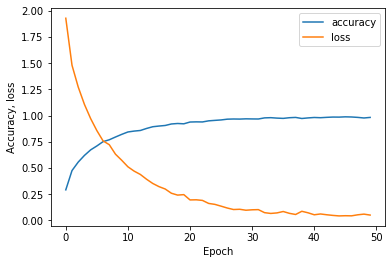

In [37]:

plt.plot(results.history['accuracy'], label = 'accuracy')
plt.plot(results.history['loss'], label = 'loss')


# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Accuracy, loss')

# Put legend table
plt.legend()

# Show the plot
plt.show()


In [38]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 7ms/step - loss: 0.5383 - accuracy: 0.8764


[0.5382798910140991, 0.8764302134513855]

### Hyperparameter Optimization

In [6]:
def train_model(padding = 'same', activation = 'relu', units = 10, optimizer='adam'):
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Conv2D(32,
                              kernel_size = (3,3),
                              strides = (1,1),
                              padding = padding,
                              activation = activation,
                              input_shape = (128,128,1)))

  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Conv2D(64,
                                kernel_size = (3,3),
                                strides = (1,1),
                                padding = padding,
                                activation = activation,))

  model.add(tf.keras.layers.MaxPool2D((2,2)))

  model.add(tf.keras.layers.Conv2D(64,
                                kernel_size = (3,3),
                                strides = (1,1),
                                padding = padding,
                                activation = activation))
  model.add(tf.keras.layers.MaxPool2D((2,2)))


  model.add(tf.keras.layers.MaxPooling2D((2,2)))

  model.add(tf.keras.layers.Flatten())

  # Add the dense layer and dropout layer
  model.add(tf.keras.layers.Dense(64, activation = activation))
  model.add(tf.keras.layers.Dropout(0.5))

  # Add the dense layer and dropout layer
  model.add(tf.keras.layers.Dense(64, activation = activation))
  model.add(tf.keras.layers.Dropout(0.5))

  # Add the output layer
  model.add(tf.keras.layers.Dense(units, activation='softmax'))

  # Compile the model
  model.compile(optimizer= optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  
  return model



In [12]:
def fit_model(X_train, y_train, X_val,y_val,batch_size = 128, epochs = 50):
  # Train the model for 50 epochs with batch size of 128
  results = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_val,y_val))
  
  return results

#### On diffrent activations


In [ ]:
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential']
scores = []

for i in (activationL):
  model = train_model(activation = i)
  results = fit_model(X_train, y_train, X_val,y_val,epochs = 50)
  loss_accuracy  = model.evaluate(X_test, y_test)
  scores.append((i, loss_accuracy))  


In [11]:
print('  activation      - loss         - accuracy')
for i in scores:
  print(i)

  activation      - loss         - accuracy
('relu', [0.48476871848106384, 0.8592677116394043])
('sigmoid', [2.26399302482605, 0.09382151067256927])
('softplus', [2.263979911804199, 0.09382151067256927])
('softsign', [0.4873788058757782, 0.8855835199356079])
('tanh', [0.4482669532299042, 0.9038901329040527])
('selu', [0.6261675357818604, 0.8810068368911743])
('elu', [0.5207996964454651, 0.8981693387031555])
('exponential', [nan, 0.10526315867900848])


We found the best acc and loss on **tanh** activation 

So we'll look at tanh activation on diffrent epochs

#### On diffrent epochs


In [ ]:
epochs = [25, 50, 75, 100]
scores2 = []

for i in (epochs):
  model = train_model(activation = 'tanh')
  results = fit_model(X_train, y_train, X_val,y_val,epochs = i)
  loss_accuracy  = model.evaluate(X_test, y_test)
  scores2.append((i, loss_accuracy))  

In [15]:
print('  epoch      - loss         - accuracy')
for i in scores2:
  print(i)

  epoch      - loss         - accuracy
(25, [0.39741021394729614, 0.8855835199356079])
(50, [0.5750241279602051, 0.8741418719291687])
(75, [0.5957902669906616, 0.8844393491744995])
(100, [0.6221513748168945, 0.8935926556587219])


It looks like when epoch is grow loss is grow it is bad for us 

i think the best epoch is 25 for this model fastest and with good scores